In [38]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scipy.stats import bernoulli

%matplotlib inline

In [3]:
import matplotlib
matplotlib.font_manager

<module 'matplotlib.font_manager' from '/Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/matplotlib/font_manager.py'>

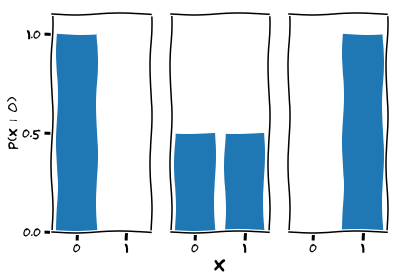

In [28]:
d0, dhalf, d1 = scipy.stats.bernoulli(0), scipy.stats.bernoulli(.5), scipy.stats.bernoulli(1)
x = np.array([0, 1])

with plt.xkcd():

    plt.subplot(131)
    plt.bar(x, d0.pmf(x))
    plt.yticks([0, .5, 1])
    plt.ylim(0, 1.1)
    plt.ylabel("p(x | o)")

    plt.subplot(132)
    plt.bar(x, dhalf.pmf(x))
    plt.yticks([])
    plt.ylim(0, 1.1)
    plt.xlabel("x", fontsize=20)

    plt.subplot(133)
    plt.bar(x, d1.pmf(x))
    plt.yticks([])
    plt.ylim(0, 1.1)
    
    plt.savefig("figures/tab-pmfs.pdf", bbox_inches="tight")

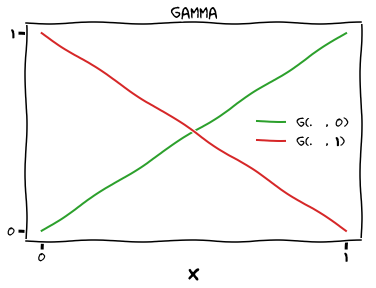

In [70]:
def gamma(x1, x2):
    return np.abs(x1-x2)

with plt.xkcd():
    
    plt.plot(x, gamma(x, 0), label="g(.  , 0)", c="C2")
    plt.plot(x, gamma(x, 1), label="g(.  , 1)", C="C3")
    plt.xlabel("x", fontsize=20)
    
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    plt.legend(frameon=False)
    plt.title("gamma")
    
    plt.savefig("figures/tab-gamma.pdf", bbox_inches="tight")

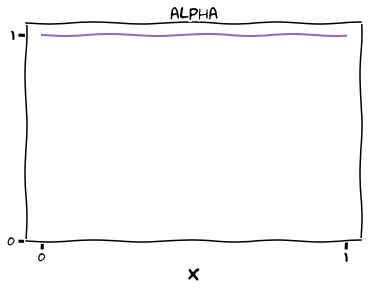

In [71]:
alpha = 1

with plt.xkcd():
    
    plt.plot(x, [alpha]*2, C="C4")
    plt.xlabel("x", fontsize=20)
    
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    
    plt.title('alpha')
    
    plt.savefig("figures/tab-alpha.pdf", bbox_inches="tight")

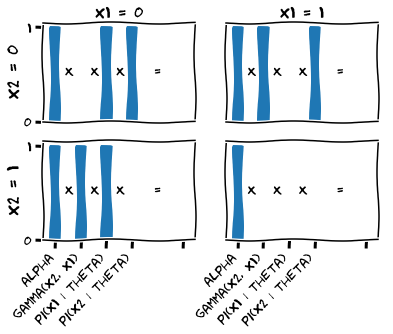

In [76]:
theta = 0
with plt.xkcd():
    
    for x1 in x:
        for x2 in x:
            ax = plt.subplot(2, 2, 1 + x1 + 2 * x2)
            
            ind = np.array([0, 1, 2, 3, 5])*2

            terms = [alpha, gamma(x2, x1), bernoulli.pmf(x1, theta), bernoulli.pmf(x2, theta)]
            plt.bar(ind, terms + [np.product(terms)])
            plt.text(.75, .5, 'X')
            plt.text(2.75, .5, 'X')
            plt.text(4.75, .5, 'X')
            plt.text(7.75, .5, '=')

            if x2 == 0:
                plt.title("x1 = {}".format(x1))
                plt.xticks([])
            else:
                ax.set_xticks(ind)
                ax.set_xticklabels(["alpha", "gamma(x2, x1)", "pi(x1 | theta)", "pi(x2 | theta)"],
                           rotation=45, ha="right")
            if x1 == 0:
                plt.ylabel("x2 = {}".format(x2), fontsize=18)
                plt.yticks([0, 1])
            else:
                plt.yticks([])
                
    plt.savefig("figures/tab-terms-theta0.pdf")

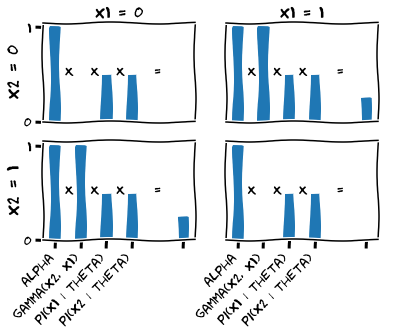

In [77]:
theta = .5
with plt.xkcd():
    
    for x1 in x:
        for x2 in x:
            ax = plt.subplot(2, 2, 1 + x1 + 2 * x2)
            
            ind = np.array([0, 1, 2, 3, 5])*2

            terms = [alpha, gamma(x2, x1), bernoulli.pmf(x1, theta), bernoulli.pmf(x2, theta)]
            plt.bar(ind, terms + [np.product(terms)])
            plt.text(.75, .5, 'X')
            plt.text(2.75, .5, 'X')
            plt.text(4.75, .5, 'X')
            plt.text(7.75, .5, '=')

            if x2 == 0:
                plt.title("x1 = {}".format(x1))
                plt.xticks([])
            else:
                ax.set_xticks(ind)
                ax.set_xticklabels(["alpha", "gamma(x2, x1)", "pi(x1 | theta)", "pi(x2 | theta)"],
                           rotation=45, ha="right")
            if x1 == 0:
                plt.ylabel("x2 = {}".format(x2), fontsize=18)
                plt.yticks([0, 1])
            else:
                plt.yticks([])
                
                plt.savefig("figures/tab-terms-theta5.pdf")